VaR(Value at Risk)

ÏùºÏ†ï Í∏∞Í∞Ñ ÎÇ¥Ïóê ÌäπÏ†ï Ïã†Î¢∞ÏàòÏ§Ä ÌïòÏóêÏÑú Î∞úÏÉùÌï† Ïàò ÏûàÎäî ÏµúÎåÄ ÏÜêÏã§Í∏àÏï°ÏùÑ ÏùòÎØ∏

## 1. Ï†ïÍ∑úÎ∂ÑÌè¨ Í∏∞Î∞ò (Parametric VaR) 

In [ ]:
# # Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ Ï†ïÎ≥¥
# portfolio_value = 10_000_000_000  # 100Ïñµ Ïõê
# daily_volatility = 0.02          # ÏùºÍ∞Ñ ÏàòÏùµÎ•† Î≥ÄÎèôÏÑ±: 2%
# confidence_level = 0.99          # Ïã†Î¢∞ÏàòÏ§Ä 99%

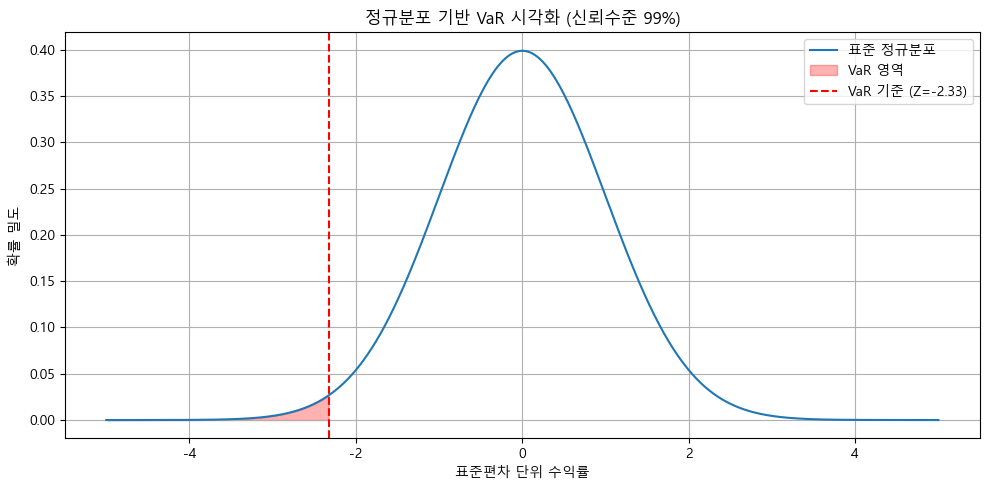

{'Ïã†Î¢∞ÏàòÏ§Ä': '99%',
 'Z-score': -2.3263,
 'ÏùºÏùº VaR (Ïõê)': 465269575,
 '10Ïùº VaR (Ïõê)': 1471311582}

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

# WindowsÏóêÏÑú ÌïúÍ∏ÄÏù¥ Ïûò Î≥¥Ïù¥Îäî Í∏∞Î≥∏ Ìè∞Ìä∏ ÏÑ§Ï†ï (Ïòà: 'Malgun Gothic')
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False  # ÏùåÏàò Î∂ÄÌò∏ Íπ®Ïßê Î∞©ÏßÄ

# Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ Ï†ïÎ≥¥
portfolio_value = 10_000_000_000  # 100Ïñµ Ïõê
daily_volatility = 0.02          # ÏùºÍ∞Ñ ÏàòÏùµÎ•† Î≥ÄÎèôÏÑ±: 2%
confidence_level = 0.99          # Ïã†Î¢∞ÏàòÏ§Ä 99%

# Z-score Í≥ÑÏÇ∞
z_score = norm.ppf(1 - confidence_level)

# VaR Í≥ÑÏÇ∞ (Îã®ÏùºÏùº Í∏∞Ï§Ä)
daily_var = -z_score * daily_volatility * portfolio_value

# 10Ïùº VaR (ÏùºÍ∞Ñ VaR √ó sqrt(10))
var_10day = daily_var * np.sqrt(10)

# ÏãúÍ∞ÅÌôî: Ï†ïÍ∑úÎ∂ÑÌè¨ Î∞è VaR ÏúÑÏπò
x = np.linspace(-5, 5, 1000)
y = norm.pdf(x, 0, 1)

plt.figure(figsize=(10, 5))
plt.plot(x, y, label="ÌëúÏ§Ä Ï†ïÍ∑úÎ∂ÑÌè¨")
plt.fill_between(x, 0, y, where=(x < z_score), color='red', alpha=0.3, label="VaR ÏòÅÏó≠")
plt.axvline(z_score, color='red', linestyle='--', label=f'VaR Í∏∞Ï§Ä (Z={z_score:.2f})')
plt.title("Ï†ïÍ∑úÎ∂ÑÌè¨ Í∏∞Î∞ò VaR ÏãúÍ∞ÅÌôî (Ïã†Î¢∞ÏàòÏ§Ä 99%)")
plt.xlabel("ÌëúÏ§ÄÌé∏Ï∞® Îã®ÏúÑ ÏàòÏùµÎ•†")
plt.ylabel("ÌôïÎ•† Î∞ÄÎèÑ")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Í≤∞Í≥º Ï∂úÎ†•
{
    "Ïã†Î¢∞ÏàòÏ§Ä": f"{int(confidence_level * 100)}%",
    "Z-score": round(z_score, 4),
    "ÏùºÏùº VaR (Ïõê)": round(daily_var),
    "10Ïùº VaR (Ïõê)": round(var_10day)
}


In [ ]:
# "99% ÌôïÎ•†Î°ú ÌïòÎ£® ÎèôÏïà 4.65Ïñµ Ïõê Ïù¥ÏÉÅ ÏÜêÏã§Ïù¥ ÎÇ† Í∞ÄÎä•ÏÑ±ÏùÄ ÏóÜÎã§."
# Îã®, 1% ÌôïÎ•†Î°ú Îçî ÌÅ∞ ÏÜêÏã§Ïù¥ Î∞úÏÉùÌï† Ïàò ÏûàÏùå ‚Üí CVaR, Stress Test ÌïÑÏöî.
#  Í∑∏ÎûòÌîÑ ÏÑ§Î™Ö
# Ï†ïÍ∑úÎ∂ÑÌè¨ Í≥°ÏÑ† ÏúÑÏùò Î∂âÏùÄ ÏùåÏòÅ ÏòÅÏó≠: ÏÜêÏã§ Î∞úÏÉù ÌôïÎ•† 1%Ïóê Ìï¥Îãπ
# Î∂âÏùÄ Ï†êÏÑ† Í∏∞Ï§Ä ÏôºÏ™Ω ÏòÅÏó≠ÏùÄ Í∑πÎã® ÏÜêÏã§ ÏòÅÏó≠ÏúºÎ°ú, VaR Í≤ΩÍ≥ÑÎ•º ÎÇòÌÉÄÎÉÖÎãàÎã§.

In [ ]:
# # Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ Ï†ïÎ≥¥
# portfolio_value = 10_000_000_000  # 100Ïñµ Ïõê
# daily_volatility = 0.02          # ÏùºÍ∞Ñ ÏàòÏùµÎ•† Î≥ÄÎèôÏÑ±: 2%
# confidence_level = 0.95          # Ïã†Î¢∞ÏàòÏ§Ä 95%

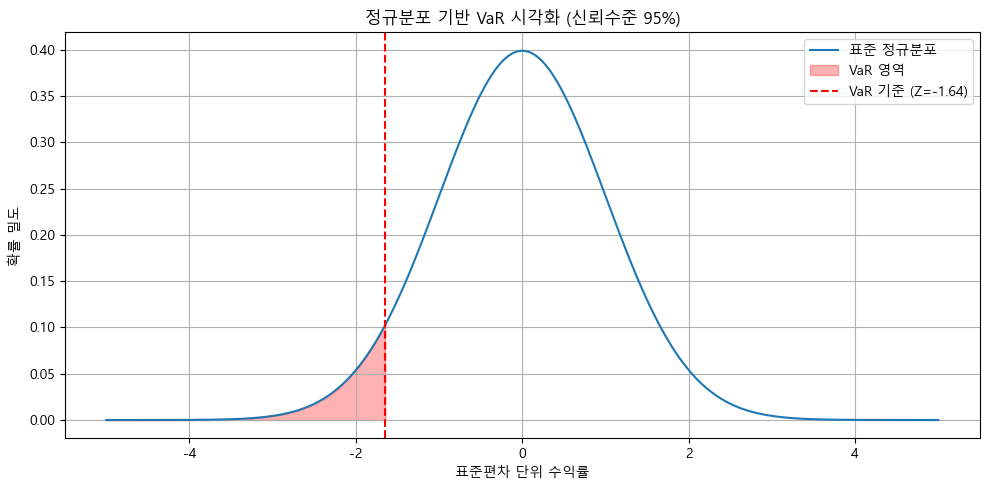

{'Ïã†Î¢∞ÏàòÏ§Ä': '95%',
 'Z-score': -1.6449,
 'ÏùºÏùº VaR (Ïõê)': 328970725,
 '10Ïùº VaR (Ïõê)': 1040296776}

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

# WindowsÏóêÏÑú ÌïúÍ∏ÄÏù¥ Ïûò Î≥¥Ïù¥Îäî Í∏∞Î≥∏ Ìè∞Ìä∏ ÏÑ§Ï†ï (Ïòà: 'Malgun Gothic')
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False  # ÏùåÏàò Î∂ÄÌò∏ Íπ®Ïßê Î∞©ÏßÄ

# Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ Ï†ïÎ≥¥
portfolio_value = 10_000_000_000  # 100Ïñµ Ïõê
daily_volatility = 0.02          # ÏùºÍ∞Ñ ÏàòÏùµÎ•† Î≥ÄÎèôÏÑ±: 2%
confidence_level = 0.95          # Ïã†Î¢∞ÏàòÏ§Ä 99%

# Z-score Í≥ÑÏÇ∞
z_score = norm.ppf(1 - confidence_level)

# VaR Í≥ÑÏÇ∞ (Îã®ÏùºÏùº Í∏∞Ï§Ä)
daily_var = -z_score * daily_volatility * portfolio_value

# 10Ïùº VaR (ÏùºÍ∞Ñ VaR √ó sqrt(10))
var_10day = daily_var * np.sqrt(10)

# ÏãúÍ∞ÅÌôî: Ï†ïÍ∑úÎ∂ÑÌè¨ Î∞è VaR ÏúÑÏπò
x = np.linspace(-5, 5, 1000)
y = norm.pdf(x, 0, 1)

plt.figure(figsize=(10, 5))
plt.plot(x, y, label="ÌëúÏ§Ä Ï†ïÍ∑úÎ∂ÑÌè¨")
plt.fill_between(x, 0, y, where=(x < z_score), color='red', alpha=0.3, label="VaR ÏòÅÏó≠")
plt.axvline(z_score, color='red', linestyle='--', label=f'VaR Í∏∞Ï§Ä (Z={z_score:.2f})')
plt.title("Ï†ïÍ∑úÎ∂ÑÌè¨ Í∏∞Î∞ò VaR ÏãúÍ∞ÅÌôî (Ïã†Î¢∞ÏàòÏ§Ä 95%)")
plt.xlabel("ÌëúÏ§ÄÌé∏Ï∞® Îã®ÏúÑ ÏàòÏùµÎ•†")
plt.ylabel("ÌôïÎ•† Î∞ÄÎèÑ")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Í≤∞Í≥º Ï∂úÎ†•
{
    "Ïã†Î¢∞ÏàòÏ§Ä": f"{int(confidence_level * 100)}%",
    "Z-score": round(z_score, 4),
    "ÏùºÏùº VaR (Ïõê)": round(daily_var),
    "10Ïùº VaR (Ïõê)": round(var_10day)
}

## 2. Historical Simulation

In [ ]:
# Í≥ºÍ±∞ ÏàòÏùµÎ•† Îç∞Ïù¥ÌÑ∞Î•º Ïù¥Ïö©ÌïòÏó¨ ÏÜêÏã§Î∂ÑÌè¨ Ï∂îÏ†ï

### 2-1 ÏÇºÏÑ±Ï†ÑÏûê (99%)

In [ ]:
# # VaR Í≥ÑÏÇ∞
# confidence_level = 0.99
# hist_var = np.percentile(returns, (1 - confidence_level) * 100)
# portfolio_value = 10_000_000_000
# hist_var_amount = hist_var * portfolio_value

#  ÏµúÍ∑º 2ÎÖÑ ÏûêÎ£å 

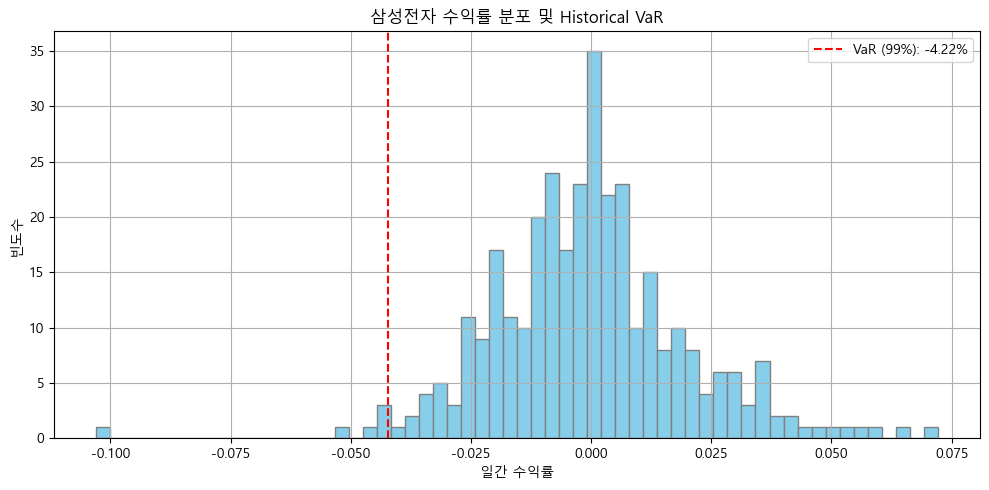

In [10]:
from pykrx import stock
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë : ÏÇºÏÑ±Ï†ÑÏûê
end_date = datetime.today()
start_date = end_date - timedelta(days=252 * 2)

df = stock.get_market_ohlcv_by_date(start_date.strftime('%Y%m%d'),
                                     end_date.strftime('%Y%m%d'), "005930")
returns = df['Ï¢ÖÍ∞Ä'].pct_change().dropna()

# VaR Í≥ÑÏÇ∞
confidence_level = 0.99
hist_var = np.percentile(returns, (1 - confidence_level) * 100)
portfolio_value = 10_000_000_000
hist_var_amount = hist_var * portfolio_value

# ÏãúÍ∞ÅÌôî
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(10, 5))
plt.hist(returns, bins=60, color='skyblue', edgecolor='gray')
plt.axvline(hist_var, color='red', linestyle='--', label=f"VaR (99%): {hist_var:.2%}")
plt.title("ÏÇºÏÑ±Ï†ÑÏûê ÏàòÏùµÎ•† Î∂ÑÌè¨ Î∞è Historical VaR")
plt.xlabel("ÏùºÍ∞Ñ ÏàòÏùµÎ•†")
plt.ylabel("ÎπàÎèÑÏàò")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
1. ÌûàÏä§ÌÜ†Í∑∏Îû® (ÎßâÎåÄÍ∑∏ÎûòÌîÑ) ‚Äì ÏàòÏùµÎ•† Î∂ÑÌè¨
XÏ∂ï: ÏÇºÏÑ±Ï†ÑÏûêÏùò ÏùºÍ∞Ñ ÏàòÏùµÎ•† (%)
YÏ∂ï: Ìï¥Îãπ ÏàòÏùµÎ•† Íµ¨Í∞ÑÏù¥ Î™á Î≤à Î∞úÏÉùÌñàÎäîÏßÄ (ÎπàÎèÑÏàò)
ÏÉâÏÉÅ: Î≥¥ÌÜµ Ïó∞Ìïú ÌååÎûë (skyblue)
Ïù¥ Î∂ÑÌè¨Îäî Í≥ºÍ±∞ ÏïΩ 2ÎÖÑÍ∞ÑÏùò Ïã§Ï†ú ÏàòÏùµÎ•†ÏùÑ Í∏∞Ï§ÄÏúºÎ°ú Íµ¨ÏÑ±ÎêòÎØÄÎ°ú, Ïã§Ï†ú ÏãúÏû• Î≥ÄÎèôÏÑ±ÏùÑ Î∞òÏòÅÌï©ÎãàÎã§.

2. Îπ®Í∞ÑÏÉâ Ï†êÏÑ† (VaR Í∏∞Ï§ÄÏÑ†) ‚Äì ÏúÑÌóò Í≤ΩÍ≥ÑÏÑ†
Ìï¥Îãπ ÏúÑÏπòÏùò ÏàòÏùµÎ•†ÏùÄ Í≥ºÍ±∞ ÏàòÏùµÎ•† Ï§ë Í∞ÄÏû• ÎÇòÏÅú 1% Íµ¨Í∞ÑÏóê Ìï¥ÎãπÌïòÎäî ÏÜêÏã§Î•†ÏûÖÎãàÎã§.
Ïòà: VaR (99%) = -3.2% ‚Üí ÌïòÎ£®Ïóê ‚Äì3.2% Ïù¥ÏÉÅ ÏÜêÏã§ ÎÇ† ÌôïÎ•†ÏùÄ **1%**ÎùºÎäî Îúª

3. VaR ÏòÅÏó≠ (Î∂âÏùÄ ÏùåÏòÅ) ‚Äì Í∑πÎã® ÏÜêÏã§ Íµ¨Í∞Ñ
Í∑∏ÎûòÌîÑÏùò ÏôºÏ™Ω Í∞ÄÏû• Ïñ¥ÎëêÏö¥ ÏòÅÏó≠
Ïã§Ï†ú ÏãúÏû•ÏóêÏÑú ÎìúÎ¨ºÍ≤å ÎÇòÌÉÄÎÇòÏßÄÎßå, Îß§Ïö∞ ÏπòÎ™ÖÏ†ÅÏù∏ ÏÜêÏã§Ïù¥ Î∞úÏÉùÌïú ÎÇ†Îì§Ïù¥ Ïù¥ ÏòÅÏó≠Ïóê Ìï¥Îãπ
VaRÏùÄ Ïù¥ Í≤ΩÍ≥ÑÍπåÏßÄÎßå Î¶¨Ïä§ÌÅ¨Î•º Ï∏°Ï†ïÌïòÍ≥†, Í∑∏ ÎÑàÎ®∏Ïùò Í∑πÎã® Î¶¨Ïä§ÌÅ¨(CVaR)Îäî Ìè¨Ìï®ÌïòÏßÄ ÏïäÏùå

üîç Ìï¥ÏÑù ÏòàÏãú
‚ÄúÏÇºÏÑ±Ï†ÑÏûêÏùò Í≥ºÍ±∞ ÏàòÏùµÎ•†ÏùÑ Í∏∞Ï§ÄÏúºÎ°ú Î≥º Îïå, 99% Ïã†Î¢∞ÏàòÏ§ÄÏóêÏÑú ÌïòÎ£® ÏÜêÏã§Ïù¥ ÏïΩ ‚Äì3.2% Ïù¥ÏÉÅÏùº ÌôïÎ•†ÏùÄ 1% ÎØ∏ÎßåÏù¥Îã§.‚Äù
Ï¶â, ÎåÄÎ∂ÄÎ∂ÑÏùò Í≤ΩÏö∞ Ìï¥Îãπ ÏàòÏùµÎ•† Î≤îÏúÑ ÏïàÏóê ÏûàÏßÄÎßå, Í∑πÎã®Ï†Å Î¶¨Ïä§ÌÅ¨Îäî VaR ÎÑàÎ®∏Ïóê Ïà®Í≤®Ï†∏ ÏûàÏùåÏùÑ ÏãúÍ∞ÅÏ†ÅÏúºÎ°ú Î≥¥Ïó¨Ï§çÎãàÎã§.

### 2-2 ÏÇºÏÑ±Ï†ÑÏûê (95%) ÏµúÍ∑º 2ÎÖÑ

In [ ]:
# # VaR Í≥ÑÏÇ∞
# confidence_level = 0.95
# hist_var = np.percentile(returns, (1 - confidence_level) * 100)
# portfolio_value = 10_000_000_000
# hist_var_amount = hist_var * portfolio_value

# ÏµúÍ∑º 2ÎÖÑÏûêÎ£å

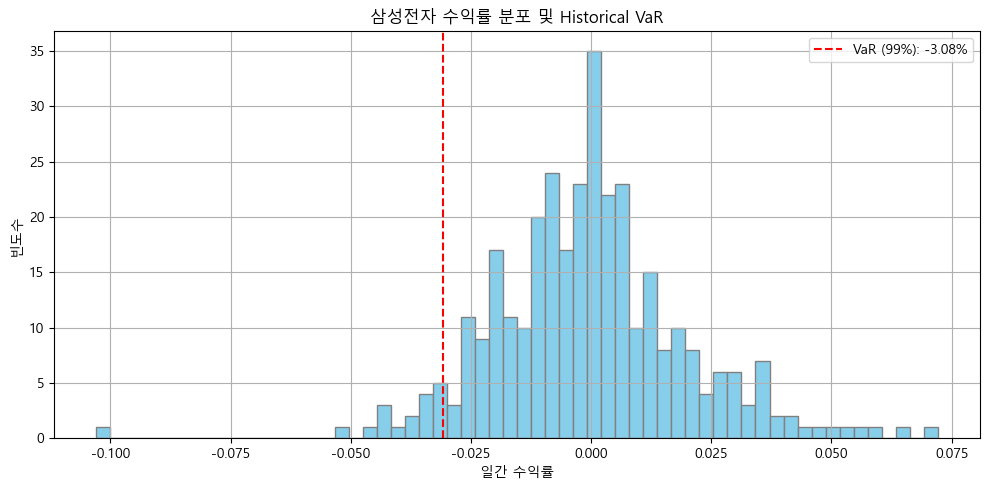

In [11]:
from pykrx import stock
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë : ÏÇºÏÑ±Ï†ÑÏûê
# timedelta(days=252 * 2)Îäî Í±∞ÎûòÏùº Í∏∞Ï§Ä ÏïΩ 2ÎÖÑÍ∞ÑÏùò ÏùºÏàòÎ•º ÏùòÎØ∏
end_date = datetime.today()
start_date = end_date - timedelta(days=252 * 2)

df = stock.get_market_ohlcv_by_date(start_date.strftime('%Y%m%d'),
                                     end_date.strftime('%Y%m%d'), "005930")
returns = df['Ï¢ÖÍ∞Ä'].pct_change().dropna()

# VaR Í≥ÑÏÇ∞
confidence_level = 0.95
hist_var = np.percentile(returns, (1 - confidence_level) * 100)
portfolio_value = 10_000_000_000
hist_var_amount = hist_var * portfolio_value

# ÏãúÍ∞ÅÌôî
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(10, 5))
plt.hist(returns, bins=60, color='skyblue', edgecolor='gray')
plt.axvline(hist_var, color='red', linestyle='--', label=f"VaR (99%): {hist_var:.2%}")
plt.title("ÏÇºÏÑ±Ï†ÑÏûê ÏàòÏùµÎ•† Î∂ÑÌè¨ Î∞è Historical VaR")
plt.xlabel("ÏùºÍ∞Ñ ÏàòÏùµÎ•†")
plt.ylabel("ÎπàÎèÑÏàò")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### 2-3 ÏÇºÏÑ±Ï†ÑÏûê (95%) ÏµúÍ∑º 1ÎÖÑ

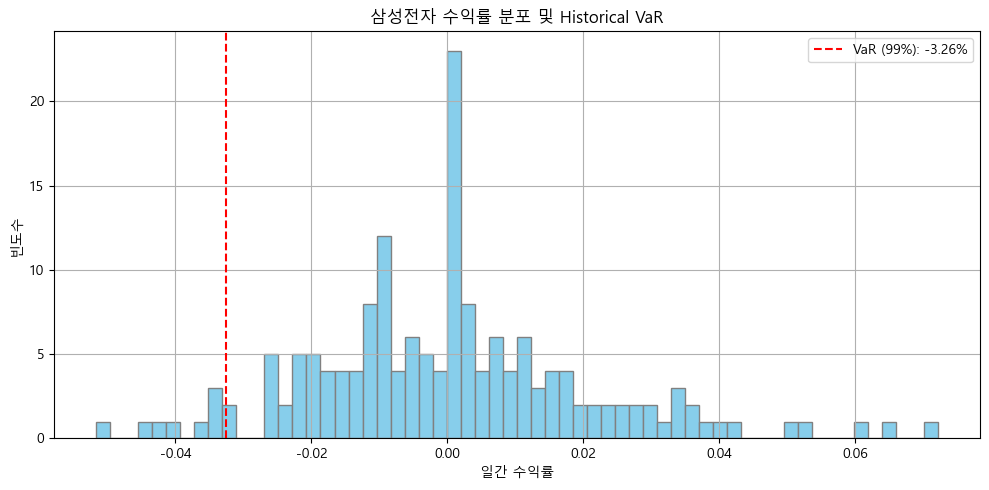

In [12]:
from pykrx import stock
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë : ÏÇºÏÑ±Ï†ÑÏûê
# timedelta(days=252 * 2)Îäî Í±∞ÎûòÏùº Í∏∞Ï§Ä ÏïΩ 2ÎÖÑÍ∞ÑÏùò ÏùºÏàòÎ•º ÏùòÎØ∏
end_date = datetime.today()
start_date = end_date - timedelta(days=252)

df = stock.get_market_ohlcv_by_date(start_date.strftime('%Y%m%d'),
                                     end_date.strftime('%Y%m%d'), "005930")
returns = df['Ï¢ÖÍ∞Ä'].pct_change().dropna()

# VaR Í≥ÑÏÇ∞
confidence_level = 0.95
hist_var = np.percentile(returns, (1 - confidence_level) * 100)
portfolio_value = 10_000_000_000
hist_var_amount = hist_var * portfolio_value

# ÏãúÍ∞ÅÌôî
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(10, 5))
plt.hist(returns, bins=60, color='skyblue', edgecolor='gray')
plt.axvline(hist_var, color='red', linestyle='--', label=f"VaR (99%): {hist_var:.2%}")
plt.title("ÏÇºÏÑ±Ï†ÑÏûê ÏàòÏùµÎ•† Î∂ÑÌè¨ Î∞è Historical VaR")
plt.xlabel("ÏùºÍ∞Ñ ÏàòÏùµÎ•†")
plt.ylabel("ÎπàÎèÑÏàò")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 3. Monte Carlo Simulation

Î™¨ÌÖåÏπ¥Î•ºÎ°ú ÏãúÎÆ¨Î†àÏù¥ÏÖò(Monte Carlo Simulation)ÏùÄ Î≥µÏû°Ìïú ÌôïÎ•† ÌòÑÏÉÅÏù¥ÎÇò Î∂àÌôïÏã§Ìïú ÏãúÏä§ÌÖúÏùÑ 
ÏàòÌïôÏ†ÅÏúºÎ°ú Î™®ÏÇ¨ÌïòÍ∏∞ ÏúÑÌï¥ ÎÇúÏàò(Random Number)Î•º ÏÇ¨Ïö©ÌïòÏó¨ 
ÏàòÏ≤ú~ÏàòÎßå Î≤àÏùò ÏãúÎÆ¨Î†àÏù¥ÏÖòÏùÑ Î∞òÎ≥µ ÏàòÌñâÌïòÎäî Í∏∞Î≤ï

### 3-1 99% 

In [ ]:
# # ÏÑ§Ï†ï: Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ Ï†ïÎ≥¥
# portfolio_value = 10_000_000_000  # 100Ïñµ Ïõê
# mu = 0.0005       # ÏùºÏùº Í∏∞ÎåÄ ÏàòÏùµÎ•† (0.05%)
# sigma = 0.02      # ÏùºÏùº ÏàòÏùµÎ•† Î≥ÄÎèôÏÑ± (2%)
# confidence_level = 0.99
# num_simulations = 10000

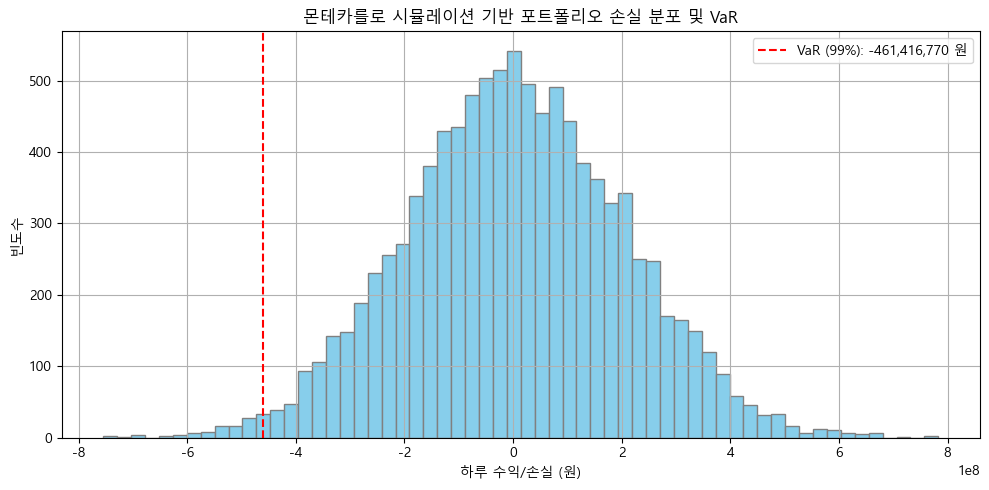

{'Ïã†Î¢∞ÏàòÏ§Ä': '99%',
 'ÏãúÎÆ¨Î†àÏù¥ÏÖò ÌöüÏàò': 10000,
 'Í∏∞ÎåÄ ÏàòÏùµÎ•† (ÏùºÍ∞Ñ)': '0.05%',
 'Î≥ÄÎèôÏÑ± (ÏùºÍ∞Ñ)': '2.00%',
 'Î™¨ÌÖåÏπ¥Î•ºÎ°ú Í∏∞Î∞ò VaR (Ïõê)': -461416770}

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# ÏÑ§Ï†ï: Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ Ï†ïÎ≥¥
portfolio_value = 10_000_000_000  # 100Ïñµ Ïõê
mu = 0.0005       # ÏùºÏùº Í∏∞ÎåÄ ÏàòÏùµÎ•† (0.05%)
sigma = 0.02      # ÏùºÏùº ÏàòÏùµÎ•† Î≥ÄÎèôÏÑ± (2%)
confidence_level = 0.99
num_simulations = 10000

# 1. ÏàòÏùµÎ•† ÏãúÎÆ¨Î†àÏù¥ÏÖò
simulated_returns = np.random.normal(loc=mu, scale=sigma, size=num_simulations)

# 2. Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ Í∞ÄÏπò Î≥ÄÌôîÎüâ Í≥ÑÏÇ∞
simulated_losses = portfolio_value * simulated_returns

# 3. VaR Í≥ÑÏÇ∞
var_threshold = np.percentile(simulated_losses, (1 - confidence_level) * 100)

# 4. ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 5))
plt.hist(simulated_losses, bins=60, color='skyblue', edgecolor='gray')
plt.axvline(var_threshold, color='red', linestyle='--', label=f"VaR (99%): {var_threshold:,.0f} Ïõê")
plt.title("Î™¨ÌÖåÏπ¥Î•ºÎ°ú ÏãúÎÆ¨Î†àÏù¥ÏÖò Í∏∞Î∞ò Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ ÏÜêÏã§ Î∂ÑÌè¨ Î∞è VaR")
plt.xlabel("ÌïòÎ£® ÏàòÏùµ/ÏÜêÏã§ (Ïõê)")
plt.ylabel("ÎπàÎèÑÏàò")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Í≤∞Í≥º ÏöîÏïΩ
{
    "Ïã†Î¢∞ÏàòÏ§Ä": f"{int(confidence_level * 100)}%",
    "ÏãúÎÆ¨Î†àÏù¥ÏÖò ÌöüÏàò": num_simulations,
    "Í∏∞ÎåÄ ÏàòÏùµÎ•† (ÏùºÍ∞Ñ)": f"{mu:.2%}",
    "Î≥ÄÎèôÏÑ± (ÏùºÍ∞Ñ)": f"{sigma:.2%}",
    "Î™¨ÌÖåÏπ¥Î•ºÎ°ú Í∏∞Î∞ò VaR (Ïõê)": round(var_threshold)
}


### 3-2 95%

In [ ]:
# # ÏÑ§Ï†ï: Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ Ï†ïÎ≥¥
# portfolio_value = 10_000_000_000  # 100Ïñµ Ïõê
# mu = 0.0005       # ÏùºÏùº Í∏∞ÎåÄ ÏàòÏùµÎ•† (0.05%)
# sigma = 0.02      # ÏùºÏùº ÏàòÏùµÎ•† Î≥ÄÎèôÏÑ± (2%)
# confidence_level = 0.95
# num_simulations = 10000

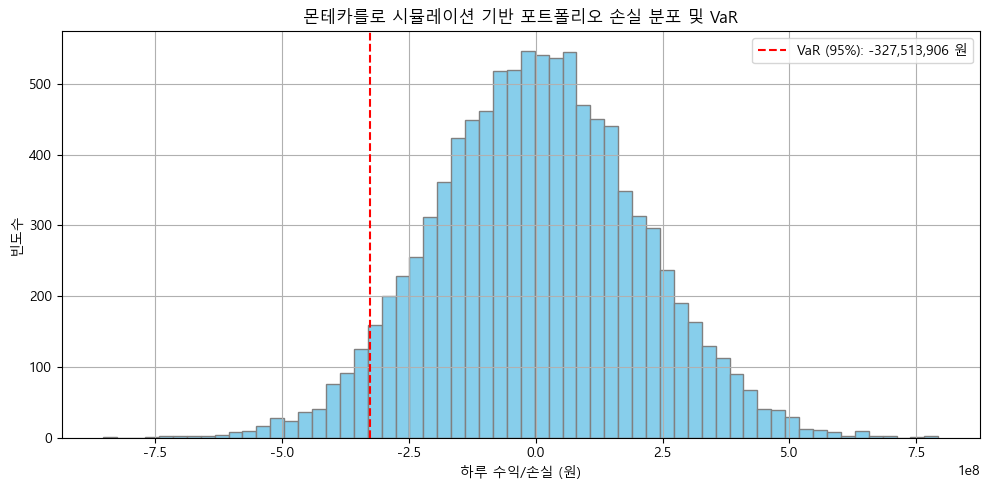

{'Ïã†Î¢∞ÏàòÏ§Ä': '95%',
 'ÏãúÎÆ¨Î†àÏù¥ÏÖò ÌöüÏàò': 10000,
 'Í∏∞ÎåÄ ÏàòÏùµÎ•† (ÏùºÍ∞Ñ)': '0.05%',
 'Î≥ÄÎèôÏÑ± (ÏùºÍ∞Ñ)': '2.00%',
 'Î™¨ÌÖåÏπ¥Î•ºÎ°ú Í∏∞Î∞ò VaR (Ïõê)': -327513906}

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# ÏÑ§Ï†ï: Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ Ï†ïÎ≥¥
portfolio_value = 10_000_000_000  # 100Ïñµ Ïõê
mu = 0.0005       # ÏùºÏùº Í∏∞ÎåÄ ÏàòÏùµÎ•† (0.05%)
sigma = 0.02      # ÏùºÏùº ÏàòÏùµÎ•† Î≥ÄÎèôÏÑ± (2%)
confidence_level = 0.95
num_simulations = 10000

# 1. ÏàòÏùµÎ•† ÏãúÎÆ¨Î†àÏù¥ÏÖò
simulated_returns = np.random.normal(loc=mu, scale=sigma, size=num_simulations)

# 2. Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ Í∞ÄÏπò Î≥ÄÌôîÎüâ Í≥ÑÏÇ∞
simulated_losses = portfolio_value * simulated_returns

# 3. VaR Í≥ÑÏÇ∞
var_threshold = np.percentile(simulated_losses, (1 - confidence_level) * 100)

# 4. ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 5))
plt.hist(simulated_losses, bins=60, color='skyblue', edgecolor='gray')
plt.axvline(var_threshold, color='red', linestyle='--', label=f"VaR (95%): {var_threshold:,.0f} Ïõê")
plt.title("Î™¨ÌÖåÏπ¥Î•ºÎ°ú ÏãúÎÆ¨Î†àÏù¥ÏÖò Í∏∞Î∞ò Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ ÏÜêÏã§ Î∂ÑÌè¨ Î∞è VaR")
plt.xlabel("ÌïòÎ£® ÏàòÏùµ/ÏÜêÏã§ (Ïõê)")
plt.ylabel("ÎπàÎèÑÏàò")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Í≤∞Í≥º ÏöîÏïΩ
{
    "Ïã†Î¢∞ÏàòÏ§Ä": f"{int(confidence_level * 100)}%",
    "ÏãúÎÆ¨Î†àÏù¥ÏÖò ÌöüÏàò": num_simulations,
    "Í∏∞ÎåÄ ÏàòÏùµÎ•† (ÏùºÍ∞Ñ)": f"{mu:.2%}",
    "Î≥ÄÎèôÏÑ± (ÏùºÍ∞Ñ)": f"{sigma:.2%}",
    "Î™¨ÌÖåÏπ¥Î•ºÎ°ú Í∏∞Î∞ò VaR (Ïõê)": round(var_threshold)
}

## 4. CVaR (Conditional Value at Risk)

In [ ]:
# CVaR (Conditional Value at Risk)Îäî Ï†ÑÌÜµÏ†ÅÏù∏ VaRÏùò ÌïúÍ≥ÑÎ•º Î≥¥ÏôÑÌïú Î¶¨Ïä§ÌÅ¨ Ï∏°Ï†ï ÏßÄÌëúÎ°ú,
# "Í∞ÄÏû• ÎÇòÏÅú ÏÜêÏã§Ïù¥ Î∞úÏÉùÌï† ÌôïÎ•† ÎÇ¥ÏóêÏÑúÏùò ÌèâÍ∑† ÏÜêÏã§ÏùÑ ÎÇòÌÉÄÎÇ∏Îã§. 
# Ï¶â, ÏÜêÏã§Ïù¥ VaRÏùÑ Ï¥àÍ≥ºÌñàÏùÑ Îïå ÌèâÍ∑†Ï†ÅÏúºÎ°ú ÏñºÎßàÎßåÌÅºÏùò ÏÜêÏã§Ïù¥ Î∞úÏÉùÌñàÎäîÏßÄÎ•º Î≥¥Ïó¨Ï£ºÎäî ÏàòÏπòÏù¥Îã§.

### 4-1 Ï†ïÍ∑úÎ∂ÑÌè¨ Í∏∞Î∞ò 99%

In [ ]:
# Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ ÌååÎùºÎØ∏ÌÑ∞
portfolio_value = 10_000_000_000  # 100Ïñµ Ïõê
mu = 0.0005        # ÏùºÏùº Í∏∞ÎåÄ ÏàòÏùµÎ•† (0.05%)
sigma = 0.02       # ÏùºÏùº Î≥ÄÎèôÏÑ± (2%)
alpha = 0.99       # Ïã†Î¢∞ÏàòÏ§Ä 99%

In [16]:
import numpy as np
from scipy.stats import norm

# Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ ÌååÎùºÎØ∏ÌÑ∞
portfolio_value = 10_000_000_000  # 100Ïñµ Ïõê
mu = 0.0005        # ÏùºÏùº Í∏∞ÎåÄ ÏàòÏùµÎ•† (0.05%)
sigma = 0.02       # ÏùºÏùº Î≥ÄÎèôÏÑ± (2%)
alpha = 0.99       # Ïã†Î¢∞ÏàòÏ§Ä 99%

# Z-score Î∞è PDF Í≥ÑÏÇ∞
z_alpha = norm.ppf(alpha)
phi_z = norm.pdf(z_alpha)

# VaR Î∞è CVaR Í≥ÑÏÇ∞ (Í∏àÏï° Îã®ÏúÑ)
var_amount = portfolio_value * (-mu + z_alpha * sigma)
cvar_amount = portfolio_value * (-mu + (sigma * phi_z) / (1 - alpha))

# Í≤∞Í≥º Ï†ïÎ¶¨
{
    "Ïã†Î¢∞ÏàòÏ§Ä": f"{int(alpha * 100)}%",
    "Z-score (z_alpha)": round(z_alpha, 4),
    "PDF Í∞í (phi_z)": round(phi_z, 4),
    "VaR (Í∏àÏï° Í∏∞Ï§Ä)": f"{var_amount:,.0f} Ïõê",
    "CVaR (Í∏àÏï° Í∏∞Ï§Ä)": f"{cvar_amount:,.0f} Ïõê"
}


{'Ïã†Î¢∞ÏàòÏ§Ä': '99%',
 'Z-score (z_alpha)': 2.3263,
 'PDF Í∞í (phi_z)': 0.0267,
 'VaR (Í∏àÏï° Í∏∞Ï§Ä)': '460,269,575 Ïõê',
 'CVaR (Í∏àÏï° Í∏∞Ï§Ä)': '528,042,844 Ïõê'}

In [ ]:
# VaR 99%: ÌïòÎ£®Ïóê ÏïΩ 4.60Ïñµ Ïõê Ïù¥ÏÉÅÏùò ÏÜêÏã§Ïù¥ Î∞úÏÉùÌï† ÌôïÎ•†Ïù¥ 1%
# CVaR 99%: Í∑∏ 1% Íµ¨Í∞ÑÏóêÏÑú ÏÜêÏã§Ïù¥ Î∞úÏÉùÌï† Í≤ΩÏö∞ ÌèâÍ∑†Ï†ÅÏúºÎ°ú ÏïΩ 5.28Ïñµ ÏõêÏùò ÏÜêÏã§Ïù¥ ÏòàÏÉÅÎê®

### 4-2 Ï†ïÍ∑úÎ∂ÑÌè¨ Í∏∞Î∞ò 95%

In [ ]:
# # Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ ÌååÎùºÎØ∏ÌÑ∞
# portfolio_value = 10_000_000_000  # 100Ïñµ Ïõê
# mu = 0.0005        # ÏùºÏùº Í∏∞ÎåÄ ÏàòÏùµÎ•† (0.05%)
# sigma = 0.02       # ÏùºÏùº Î≥ÄÎèôÏÑ± (2%)
# alpha = 0.95       # Ïã†Î¢∞ÏàòÏ§Ä 95%

In [17]:
import numpy as np
from scipy.stats import norm

# Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ ÌååÎùºÎØ∏ÌÑ∞
portfolio_value = 10_000_000_000  # 100Ïñµ Ïõê
mu = 0.0005        # ÏùºÏùº Í∏∞ÎåÄ ÏàòÏùµÎ•† (0.05%)
sigma = 0.02       # ÏùºÏùº Î≥ÄÎèôÏÑ± (2%)
alpha = 0.95       # Ïã†Î¢∞ÏàòÏ§Ä 95%

# Z-score Î∞è PDF Í≥ÑÏÇ∞
z_alpha = norm.ppf(alpha)
phi_z = norm.pdf(z_alpha)

# VaR Î∞è CVaR Í≥ÑÏÇ∞ (Í∏àÏï° Îã®ÏúÑ)
var_amount = portfolio_value * (-mu + z_alpha * sigma)
cvar_amount = portfolio_value * (-mu + (sigma * phi_z) / (1 - alpha))

# Í≤∞Í≥º Ï†ïÎ¶¨
{
    "Ïã†Î¢∞ÏàòÏ§Ä": f"{int(alpha * 100)}%",
    "Z-score (z_alpha)": round(z_alpha, 4),
    "PDF Í∞í (phi_z)": round(phi_z, 4),
    "VaR (Í∏àÏï° Í∏∞Ï§Ä)": f"{var_amount:,.0f} Ïõê",
    "CVaR (Í∏àÏï° Í∏∞Ï§Ä)": f"{cvar_amount:,.0f} Ïõê"
}


{'Ïã†Î¢∞ÏàòÏ§Ä': '95%',
 'Z-score (z_alpha)': 1.6449,
 'PDF Í∞í (phi_z)': 0.1031,
 'VaR (Í∏àÏï° Í∏∞Ï§Ä)': '323,970,725 Ïõê',
 'CVaR (Í∏àÏï° Í∏∞Ï§Ä)': '407,542,562 Ïõê'}

### 4-3 Ï†ïÍ∑úÎ∂ÑÌè¨ Í∏∞Î∞ò : VaR Í≥º CVaR

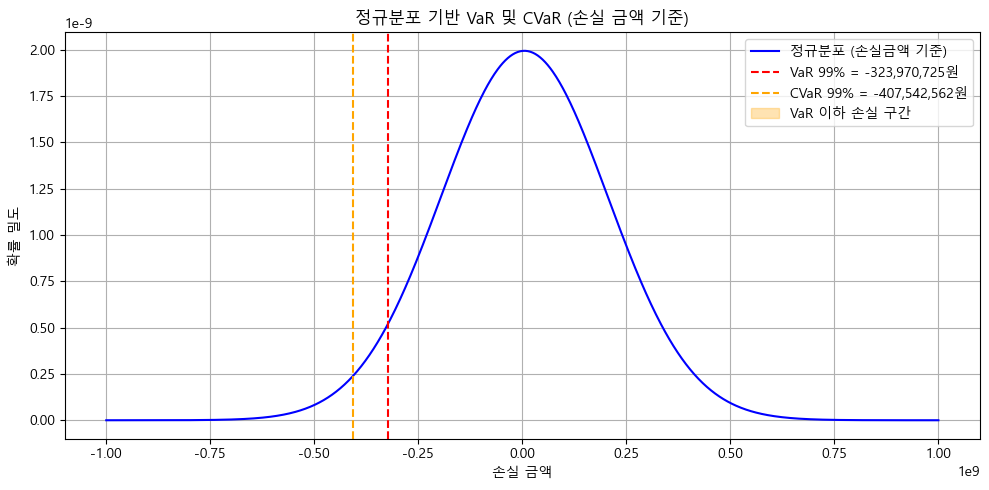

In [21]:
# Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ Í∏àÏï° Í∏∞Ï§Ä ÏàòÏùµÎ•† ‚Üí ÏÜêÏã§Í∏àÏï°ÏúºÎ°ú Î≥ÄÌôò
var_amount_left = var_rate_left * portfolio_value
cvar_amount_left = cvar_rate_left * portfolio_value

# Í∏àÏï° Í∏∞Ï§ÄÏúºÎ°ú Î≥ÄÌôòÎêú xÏ∂ï
x_amt = x * portfolio_value
y_amt = norm.pdf(x, loc=mu, scale=sigma) / portfolio_value  # ÌôïÎ•† Î∞ÄÎèÑ Î≥¥Ï†ï

# VaR Ïù¥Ìïò Íµ¨Í∞Ñ Í∏àÏï° Ï∂ï
x_cvar_amt = x_amt[x <= var_rate_left * portfolio_value]
y_cvar_amt = y_amt[x <= var_rate_left * portfolio_value]

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 5))
plt.plot(x_amt, y_amt, label='Ï†ïÍ∑úÎ∂ÑÌè¨ (ÏÜêÏã§Í∏àÏï° Í∏∞Ï§Ä)', color='blue')

# VaR Í∏àÏï° Í∏∞Ï§Ä ÏÑ†
plt.axvline(var_amount_left, color='red', linestyle='--', label=f'VaR 99% = {var_amount_left:,.0f}Ïõê')
# CVaR Í∏àÏï° Í∏∞Ï§Ä ÏÑ†
plt.axvline(cvar_amount_left, color='orange', linestyle='--', label=f'CVaR 99% = {cvar_amount_left:,.0f}Ïõê')

# Íº¨Î¶¨ ÏùåÏòÅ ÏòÅÏó≠
plt.fill_between(x_cvar_amt, 0, y_cvar_amt, color='orange', alpha=0.3, label='VaR Ïù¥Ìïò ÏÜêÏã§ Íµ¨Í∞Ñ')

# ÏãúÍ∞Å ÏÑ§Ï†ï
plt.title("Ï†ïÍ∑úÎ∂ÑÌè¨ Í∏∞Î∞ò VaR Î∞è CVaR (ÏÜêÏã§ Í∏àÏï° Í∏∞Ï§Ä)")
plt.xlabel("ÏÜêÏã§ Í∏àÏï°")
plt.ylabel("ÌôïÎ•† Î∞ÄÎèÑ")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


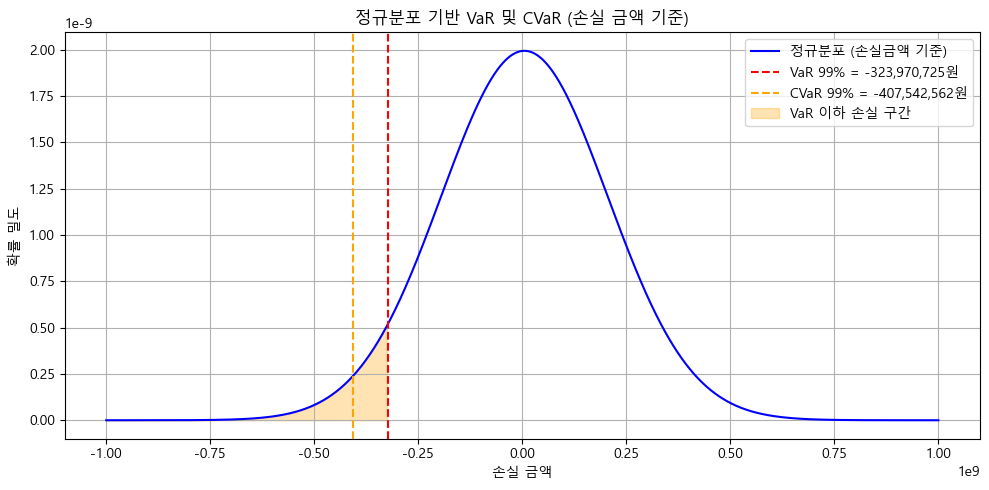

In [22]:
# ÏÜêÏã§ Í∏àÏï° Í∏∞Ï§Ä: Íº¨Î¶¨ Íµ¨Í∞Ñ Ïû¨Í≥ÑÏÇ∞ (x_amt Í∏∞Ï§ÄÏúºÎ°ú)
x_amt = x * portfolio_value
y_amt = norm.pdf(x, loc=mu, scale=sigma) / portfolio_value

# VaR Í∏∞Ï§ÄÏÑ† Ï¢åÏ∏° Í∞íÎì§Îßå ÏÑ†ÌÉù (xÍ∞í Í∏∞Ï§ÄÏúºÎ°ú ÌïÑÌÑ∞ÎßÅ)
mask = x_amt <= var_amount_left
x_cvar_amt = x_amt[mask]
y_cvar_amt = y_amt[mask]

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 5))
plt.plot(x_amt, y_amt, label='Ï†ïÍ∑úÎ∂ÑÌè¨ (ÏÜêÏã§Í∏àÏï° Í∏∞Ï§Ä)', color='blue')

# VaR Í∏àÏï° Í∏∞Ï§Ä ÏÑ†
plt.axvline(var_amount_left, color='red', linestyle='--', label=f'VaR 99% = {var_amount_left:,.0f}Ïõê')
# CVaR Í∏àÏï° Í∏∞Ï§Ä ÏÑ†
plt.axvline(cvar_amount_left, color='orange', linestyle='--', label=f'CVaR 99% = {cvar_amount_left:,.0f}Ïõê')

# Ï£ºÌô©ÏÉâ Íº¨Î¶¨ ÏùåÏòÅ ÏòÅÏó≠ (CVaR Ï†ïÏùòÏó≠)
plt.fill_between(x_cvar_amt, 0, y_cvar_amt, color='orange', alpha=0.3, label='VaR Ïù¥Ìïò ÏÜêÏã§ Íµ¨Í∞Ñ')

# ÏãúÍ∞Å ÏÑ§Ï†ï
plt.title("Ï†ïÍ∑úÎ∂ÑÌè¨ Í∏∞Î∞ò VaR Î∞è CVaR (ÏÜêÏã§ Í∏àÏï° Í∏∞Ï§Ä)")
plt.xlabel("ÏÜêÏã§ Í∏àÏï°")
plt.ylabel("ÌôïÎ•† Î∞ÄÎèÑ")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


### 4-4 ÌûàÏä§ÌÜ†Î¶¨Ïª¨ CVaR : ÏµúÍ∑º2ÎÖÑ (99%)

In [23]:
from pykrx import stock
from datetime import datetime, timedelta

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë: ÏÇºÏÑ±Ï†ÑÏûê ÏµúÍ∑º 2ÎÖÑ
end_date = datetime.today()
start_date = end_date - timedelta(days=252 * 2)
df = stock.get_market_ohlcv_by_date(start_date.strftime('%Y%m%d'),
                                     end_date.strftime('%Y%m%d'), "005930")
returns = df['Ï¢ÖÍ∞Ä'].pct_change().dropna()

# Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ Í∏àÏï°
portfolio_value = 10_000_000_000  # 100Ïñµ Ïõê
alpha = 0.99  # 99% Ïã†Î¢∞ÏàòÏ§Ä

# ÏàòÏùµÎ•† Ï†ïÎ†¨ (Ïò§Î¶ÑÏ∞®Ïàú)
sorted_returns = returns.sort_values()
var_index = int((1 - alpha) * len(sorted_returns))
hist_var_rate = sorted_returns.iloc[var_index]
hist_cvar_rate = sorted_returns.iloc[:var_index].mean()

# Í∏àÏï°ÏúºÎ°ú Î≥ÄÌôò
hist_var_amt = hist_var_rate * portfolio_value
hist_cvar_amt = hist_cvar_rate * portfolio_value

# Í≤∞Í≥º Ï†ïÎ¶¨
hist_results = {
    "VaR 99% ÏàòÏùµÎ•†": hist_var_rate,
    "CVaR 99% ÏàòÏùµÎ•†": hist_cvar_rate,
    "VaR 99% ÏÜêÏã§Í∏àÏï°": hist_var_amt,
    "CVaR 99% ÏÜêÏã§Í∏àÏï°": hist_cvar_amt,
    "Í¥ÄÏ∏°Ïπò Í∞úÏàò": len(sorted_returns)
}
hist_results


{'VaR 99% ÏàòÏùµÎ•†': -0.04230118443316411,
 'CVaR 99% ÏàòÏùµÎ•†': -0.06666383295979665,
 'VaR 99% ÏÜêÏã§Í∏àÏï°': -423011844.3316411,
 'CVaR 99% ÏÜêÏã§Í∏àÏï°': -666638329.5979666,
 'Í¥ÄÏ∏°Ïπò Í∞úÏàò': 332}

In [ ]:
# ÏµúÍ∑º 1ÎÖÑ (99%)

In [24]:
from pykrx import stock
from datetime import datetime, timedelta

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë: ÏÇºÏÑ±Ï†ÑÏûê ÏµúÍ∑º 1ÎÖÑ
end_date = datetime.today()
start_date = end_date - timedelta(days=252)
df = stock.get_market_ohlcv_by_date(start_date.strftime('%Y%m%d'),
                                     end_date.strftime('%Y%m%d'), "005930")
returns = df['Ï¢ÖÍ∞Ä'].pct_change().dropna()

# Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ Í∏àÏï°
portfolio_value = 10_000_000_000  # 100Ïñµ Ïõê
alpha = 0.99  # 99% Ïã†Î¢∞ÏàòÏ§Ä

# ÏàòÏùµÎ•† Ï†ïÎ†¨ (Ïò§Î¶ÑÏ∞®Ïàú)
sorted_returns = returns.sort_values()
var_index = int((1 - alpha) * len(sorted_returns))
hist_var_rate = sorted_returns.iloc[var_index]
hist_cvar_rate = sorted_returns.iloc[:var_index].mean()

# Í∏àÏï°ÏúºÎ°ú Î≥ÄÌôò
hist_var_amt = hist_var_rate * portfolio_value
hist_cvar_amt = hist_cvar_rate * portfolio_value

# Í≤∞Í≥º Ï†ïÎ¶¨
hist_results = {
    "VaR 99% ÏàòÏùµÎ•†": hist_var_rate,
    "CVaR 99% ÏàòÏùµÎ•†": hist_cvar_rate,
    "VaR 99% ÏÜêÏã§Í∏àÏï°": hist_var_amt,
    "CVaR 99% ÏÜêÏã§Í∏àÏï°": hist_cvar_amt,
    "Í¥ÄÏ∏°Ïπò Í∞úÏàò": len(sorted_returns)
}
hist_results


{'VaR 99% ÏàòÏùµÎ•†': -0.04528301886792452,
 'CVaR 99% ÏàòÏùµÎ•†': -0.05169340463458105,
 'VaR 99% ÏÜêÏã§Í∏àÏï°': -452830188.6792452,
 'CVaR 99% ÏÜêÏã§Í∏àÏï°': -516934046.34581053,
 'Í¥ÄÏ∏°Ïπò Í∞úÏàò': 166}

### 4-5 ÌûàÏä§ÌÜ†Î¶¨Ïª¨ VaR & CVaR 

In [ ]:
# Ï†ïÍ∑úÎ∂ÑÌè¨Î•º Í∞ÄÏ†ïÌïòÏßÄ ÏïäÍ≥†, Ïã§Ï†ú ÏàòÏùµÎ•† Îç∞Ïù¥ÌÑ∞Î•º Í∏∞Î∞òÏúºÎ°ú Í∑πÎã® ÏÜêÏã§ Íµ¨Í∞ÑÏùÑ ÏßÅÏ†ë Ï∏°Ï†ï
# Îç∞Ïù¥ÌÑ∞Í∞Ä ÎßéÏùÑÏàòÎ°ù Ïã†Î¢∞ÎèÑ ÎÜíÏùÄ CVaR Ï∂îÏ†ï Í∞ÄÎä•
# Ïã§Ï†ú Ìà¨Ïûê Ï†ÑÎûµÏóêÏÑú Î¶¨Ïä§ÌÅ¨ Î∞±ÌÖåÏä§Ìä∏ Í∏∞Î∞ò ÏÜêÏã§ Í¥ÄÎ¶¨Ïóê Îß§Ïö∞ Ï§ëÏöî

In [25]:
from pykrx import stock
from datetime import datetime, timedelta
import pandas as pd

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë: ÏÇºÏÑ±Ï†ÑÏûê ÏµúÍ∑º 2ÎÖÑ
end_date = datetime.today()
start_date = end_date - timedelta(days=252 * 2)

df = stock.get_market_ohlcv_by_date(start_date.strftime('%Y%m%d'),
                                     end_date.strftime('%Y%m%d'), "005930")
returns = df['Ï¢ÖÍ∞Ä'].pct_change().dropna()

# Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ Í∏àÏï° ÏÑ§Ï†ï
portfolio_value = 10_000_000_000  # 100Ïñµ Ïõê
alpha = 0.99  # Ïã†Î¢∞ÏàòÏ§Ä 99%

# ÏàòÏùµÎ•† Ï†ïÎ†¨
sorted_returns = returns.sort_values()

# VaR Í≥ÑÏÇ∞ (1% Î∂ÑÏúÑÏàò)
var_index = int((1 - alpha) * len(sorted_returns))
hist_var_rate = sorted_returns.iloc[var_index]

# CVaR Í≥ÑÏÇ∞ (VaR Ïù¥Ìïò ÏàòÏùµÎ•†Ïùò ÌèâÍ∑†)
hist_cvar_rate = sorted_returns.iloc[:var_index].mean()

# Í∏àÏï° Í∏∞Ï§Ä Î≥ÄÌôò
hist_var_amt = hist_var_rate * portfolio_value
hist_cvar_amt = hist_cvar_rate * portfolio_value

# Í≤∞Í≥º Ï∂úÎ†•
print("üìå ÌûàÏä§ÌÜ†Î¶¨Ïª¨ ÏàòÏùµÎ•† Í∏∞Î∞ò VaR & CVaR (ÏÇºÏÑ±Ï†ÑÏûê)")
print(f" - Í¥ÄÏ∏°Ïπò Ïàò: {len(sorted_returns)}")
print(f" - VaR 99% ÏàòÏùµÎ•†: {hist_var_rate:.2%}")
print(f" - CVaR 99% ÏàòÏùµÎ•†: {hist_cvar_rate:.2%}")
print(f" - VaR 99% ÏÜêÏã§Í∏àÏï°: {hist_var_amt:,.0f} Ïõê")
print(f" - CVaR 99% ÏÜêÏã§Í∏àÏï°: {hist_cvar_amt:,.0f} Ïõê")


üìå ÌûàÏä§ÌÜ†Î¶¨Ïª¨ ÏàòÏùµÎ•† Í∏∞Î∞ò VaR & CVaR (ÏÇºÏÑ±Ï†ÑÏûê)
 - Í¥ÄÏ∏°Ïπò Ïàò: 332
 - VaR 99% ÏàòÏùµÎ•†: -4.23%
 - CVaR 99% ÏàòÏùµÎ•†: -6.67%
 - VaR 99% ÏÜêÏã§Í∏àÏï°: -423,011,844 Ïõê
 - CVaR 99% ÏÜêÏã§Í∏àÏï°: -666,638,330 Ïõê


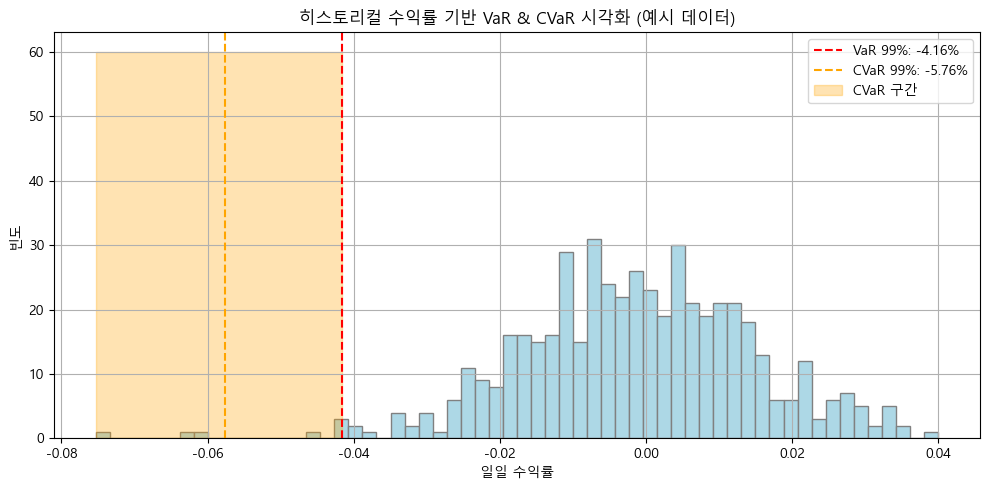

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# ÏòàÏãúÏö©: Í∞ÄÏÉÅÏùò ÏàòÏùµÎ•† Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ± (Ï†ïÍ∑úÎ∂ÑÌè¨ ÏïÑÎãò)
np.random.seed(0)
simulated_returns = np.random.normal(loc=-0.0005, scale=0.015, size=500)  # ÎπÑÎåÄÏπ≠ ÏàòÏùµÎ•† ÏãúÎÆ¨Î†àÏù¥ÏÖò
simulated_returns = np.concatenate([simulated_returns, np.random.uniform(-0.08, -0.04, 5)])  # Í∑πÎã® ÏÜêÏã§ Ï∂îÍ∞Ä

# Ï†ïÎ†¨
sorted_returns = pd.Series(simulated_returns).sort_values()
alpha = 0.99
portfolio_value = 10_000_000_000

# ÌûàÏä§ÌÜ†Î¶¨Ïª¨ VaR & CVaR Í≥ÑÏÇ∞
var_index = int((1 - alpha) * len(sorted_returns))
hist_var = sorted_returns.iloc[var_index]
hist_cvar = sorted_returns.iloc[:var_index].mean()

var_amt = hist_var * portfolio_value
cvar_amt = hist_cvar * portfolio_value

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 5))
plt.hist(simulated_returns, bins=60, color='lightblue', edgecolor='gray')
plt.axvline(hist_var, color='red', linestyle='--', label=f"VaR 99%: {hist_var:.2%}")
plt.axvline(hist_cvar, color='orange', linestyle='--', label=f"CVaR 99%: {hist_cvar:.2%}")

# Íº¨Î¶¨ ÏùåÏòÅ
plt.fill_betweenx(y=[0, 60], x1=sorted_returns.min(), x2=hist_var, color='orange', alpha=0.3, label='CVaR Íµ¨Í∞Ñ')

# ÏÑ§Ï†ï
plt.title("ÌûàÏä§ÌÜ†Î¶¨Ïª¨ ÏàòÏùµÎ•† Í∏∞Î∞ò VaR & CVaR ÏãúÍ∞ÅÌôî (ÏòàÏãú Îç∞Ïù¥ÌÑ∞)")
plt.xlabel("ÏùºÏùº ÏàòÏùµÎ•†")
plt.ylabel("ÎπàÎèÑ")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


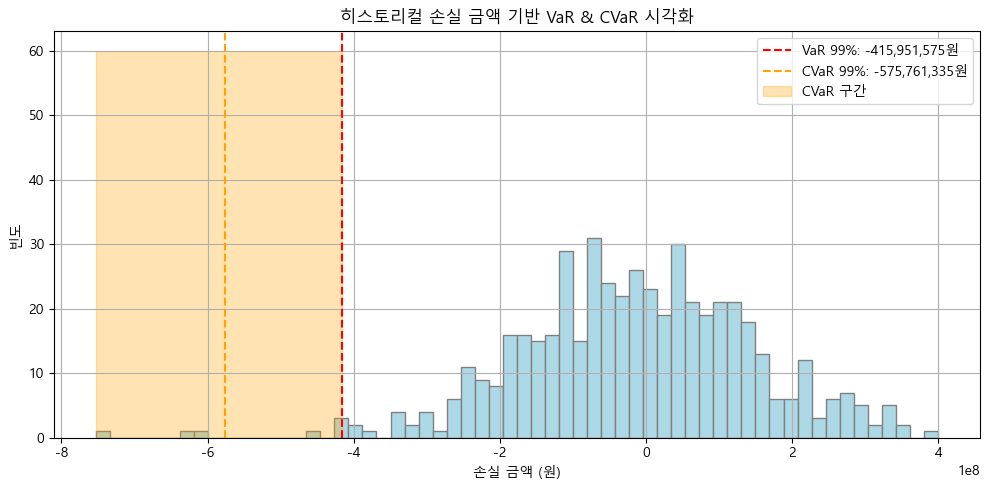

In [27]:
# ÏÜêÏã§ Í∏àÏï°ÏúºÎ°ú Î≥ÄÌôò
simulated_loss_amt = simulated_returns * portfolio_value
sorted_loss_amt = np.sort(simulated_loss_amt)

# Í∏àÏï° Í∏∞Ï§Ä VaR & CVaR Í≥ÑÏÇ∞
var_index_amt = int((1 - alpha) * len(sorted_loss_amt))
hist_var_amt = sorted_loss_amt[var_index_amt]
hist_cvar_amt = sorted_loss_amt[:var_index_amt].mean()

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 5))
plt.hist(simulated_loss_amt, bins=60, color='lightblue', edgecolor='gray')
plt.axvline(hist_var_amt, color='red', linestyle='--', label=f"VaR 99%: {hist_var_amt:,.0f}Ïõê")
plt.axvline(hist_cvar_amt, color='orange', linestyle='--', label=f"CVaR 99%: {hist_cvar_amt:,.0f}Ïõê")

# Íº¨Î¶¨ ÏùåÏòÅ ÏòÅÏó≠
plt.fill_betweenx(y=[0, 60], x1=sorted_loss_amt.min(), x2=hist_var_amt, color='orange', alpha=0.3, label='CVaR Íµ¨Í∞Ñ')

# ÏÑ§Ï†ï
plt.title("ÌûàÏä§ÌÜ†Î¶¨Ïª¨ ÏÜêÏã§ Í∏àÏï° Í∏∞Î∞ò VaR & CVaR ÏãúÍ∞ÅÌôî")
plt.xlabel("ÏÜêÏã§ Í∏àÏï° (Ïõê)")
plt.ylabel("ÎπàÎèÑ")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## 5. Î™¨ÌÖåÏπ¥Î•ºÎ°ú ÏãúÎÆ¨Î†àÏù¥ÏÖò(Monte Carlo Simulation) CVaR

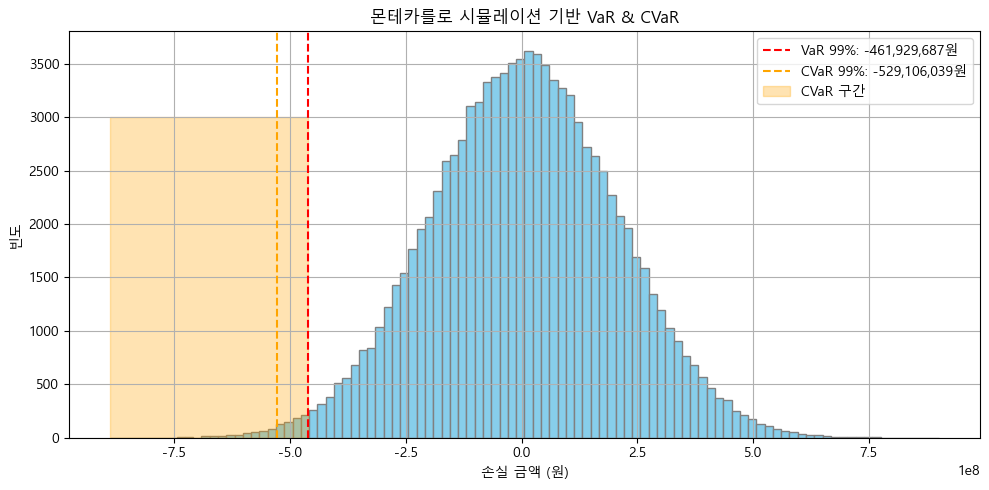

{'VaR 99% ÏÜêÏã§Í∏àÏï°': -461929686.58062565,
 'CVaR 99% ÏÜêÏã§Í∏àÏï°': -529106039.10205424,
 'ÏÉòÌîå Ïàò': 100000}

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# ÏãúÎÆ¨Î†àÏù¥ÏÖò ÏÑ§Ï†ï
mu = 0.0005          # ÏùºÍ∞Ñ Í∏∞ÎåÄ ÏàòÏùµÎ•† (0.05%)
sigma = 0.02         # ÏùºÍ∞Ñ Î≥ÄÎèôÏÑ± (2%)
portfolio_value = 10_000_000_000  # 100Ïñµ Ïõê
alpha = 0.99         # Ïã†Î¢∞ÏàòÏ§Ä
num_simulations = 100_000

# Î™¨ÌÖåÏπ¥Î•ºÎ°ú ÏãúÎÆ¨Î†àÏù¥ÏÖò
np.random.seed(42)
simulated_returns = np.random.normal(loc=mu, scale=sigma, size=num_simulations)
simulated_losses = simulated_returns * portfolio_value

# ÏÜêÏã§ Í∏∞Ï§Ä Ïò§Î¶ÑÏ∞®Ïàú Ï†ïÎ†¨
sorted_losses = np.sort(simulated_losses)
var_index = int((1 - alpha) * num_simulations)
mc_var = sorted_losses[var_index]
mc_cvar = sorted_losses[:var_index].mean()

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 5))
plt.hist(simulated_losses, bins=100, color='skyblue', edgecolor='gray')
plt.axvline(mc_var, color='red', linestyle='--', label=f'VaR 99%: {mc_var:,.0f}Ïõê')
plt.axvline(mc_cvar, color='orange', linestyle='--', label=f'CVaR 99%: {mc_cvar:,.0f}Ïõê')
plt.fill_betweenx(y=[0, 3000], x1=sorted_losses.min(), x2=mc_var, color='orange', alpha=0.3, label='CVaR Íµ¨Í∞Ñ')

plt.title("Î™¨ÌÖåÏπ¥Î•ºÎ°ú ÏãúÎÆ¨Î†àÏù¥ÏÖò Í∏∞Î∞ò VaR & CVaR")
plt.xlabel("ÏÜêÏã§ Í∏àÏï° (Ïõê)")
plt.ylabel("ÎπàÎèÑ")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Í≤∞Í≥º ÏöîÏïΩ Ï∂úÎ†•
{
    "VaR 99% ÏÜêÏã§Í∏àÏï°": mc_var,
    "CVaR 99% ÏÜêÏã§Í∏àÏï°": mc_cvar,
    "ÏÉòÌîå Ïàò": num_simulations
}


## 6. CVaR Í∏∞Î∞ò Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ ÏµúÏ†ÅÌôî 

C:\Users\JYB\AppData\Local\Temp\ipykernel_21156\3439294643.py:19: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  simulated_returns = np.random.multivariate_normal(mean=mu, cov=cov, size=n_simulations)


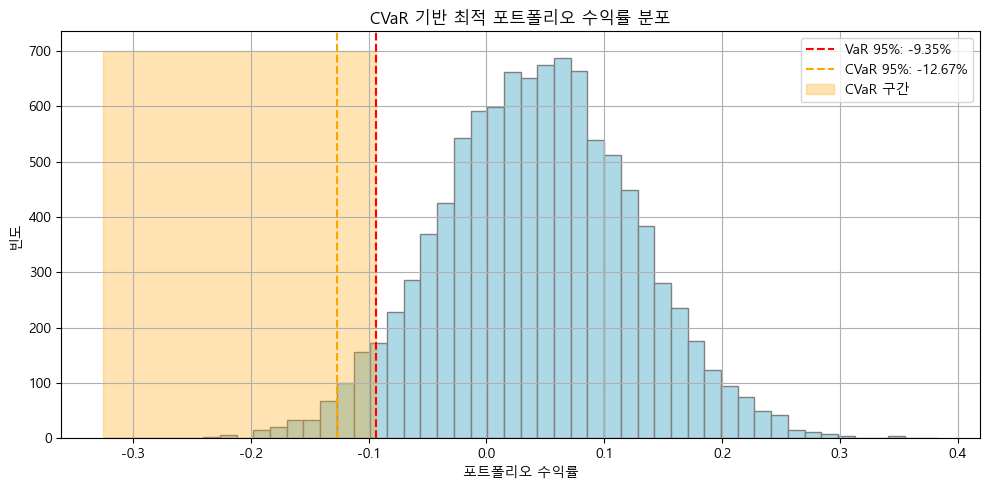

{'ÏµúÏ†Å ÏûêÏÇ∞ ÎπÑÏ§ë': [0.2867, 0.0, 0.7133], 'VaR 95%': -0.0935, 'CVaR 95%': -0.1267}

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# ÏÑ§Ï†ï: Í∞ÄÏÉÅÏùò 3ÏûêÏÇ∞ Í∏∞ÎåÄ ÏàòÏùµÎ•† Î∞è Í≥µÎ∂ÑÏÇ∞
np.random.seed(42)
n_assets = 3
n_simulations = 10000
alpha = 0.95  # Ïã†Î¢∞ÏàòÏ§Ä 95%
mu = np.array([0.05, 0.07, 0.04])  # Í∏∞ÎåÄ ÏàòÏùµÎ•†
cov = np.array([
    [0.10**2, 0.008, 0.006],
    [0.008, 0.12**2, 0.010],
    [0.006, 0.010, 0.08**2]
])

# 1. ÏãúÎÇòÎ¶¨Ïò§ ÏàòÏùµÎ•† ÏÉùÏÑ± (Ï†ïÍ∑úÎ∂ÑÌè¨ Í∏∞Î∞ò)
simulated_returns = np.random.multivariate_normal(mean=mu, cov=cov, size=n_simulations)

# 2. Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ ÏàòÏùµÎ•† Ìï®Ïàò
def portfolio_returns(weights, scenarios):
    return scenarios @ weights

# 3. CVaR Í≥ÑÏÇ∞ Ìï®Ïàò
def cvar_loss(weights):
    port_ret = portfolio_returns(weights, simulated_returns)
    var_threshold = np.percentile(port_ret, 100 * (1 - alpha))
    cvar = -port_ret[port_ret <= var_threshold].mean()  # ÏÜêÏã§Î°ú Í∞ÑÏ£ºÌï¥ ÏùåÏàò Ï≤òÎ¶¨
    return cvar

# 4. ÏµúÏ†ÅÌôî ÏÑ§Ï†ï
init_guess = np.array([1/n_assets] * n_assets)
bounds = [(0, 1) for _ in range(n_assets)]
constraints = [{'type': 'eq', 'fun': lambda x: np.sum(x) - 1}]

# 5. ÏµúÏ†ÅÌôî ÏàòÌñâ
result = minimize(cvar_loss, init_guess, method='SLSQP', bounds=bounds, constraints=constraints)

# Í≤∞Í≥º
opt_weights = result.x
opt_port_returns = portfolio_returns(opt_weights, simulated_returns)
var_95 = np.percentile(opt_port_returns, 100 * (1 - alpha))
cvar_95 = opt_port_returns[opt_port_returns <= var_95].mean()

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 5))
plt.hist(opt_port_returns, bins=50, color='lightblue', edgecolor='gray')
plt.axvline(var_95, color='red', linestyle='--', label=f'VaR 95%: {var_95:.2%}')
plt.axvline(cvar_95, color='orange', linestyle='--', label=f'CVaR 95%: {cvar_95:.2%}')
plt.fill_betweenx(y=[0, 700], x1=min(opt_port_returns), x2=var_95, color='orange', alpha=0.3, label='CVaR Íµ¨Í∞Ñ')
plt.title("CVaR Í∏∞Î∞ò ÏµúÏ†Å Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ ÏàòÏùµÎ•† Î∂ÑÌè¨")
plt.xlabel("Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ ÏàòÏùµÎ•†")
plt.ylabel("ÎπàÎèÑ")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Í≤∞Í≥º ÏöîÏïΩ
{
    "ÏµúÏ†Å ÏûêÏÇ∞ ÎπÑÏ§ë": opt_weights.round(4).tolist(),
    "VaR 95%": round(var_95, 4),
    "CVaR 95%": round(cvar_95, 4)
}


#### ÏÑ§Ï†ï: 3Í∞ú Ï¢ÖÎ™© (ÏÇºÏÑ±Ï†ÑÏûê, SKÌïòÏù¥ÎãâÏä§, NAVER)

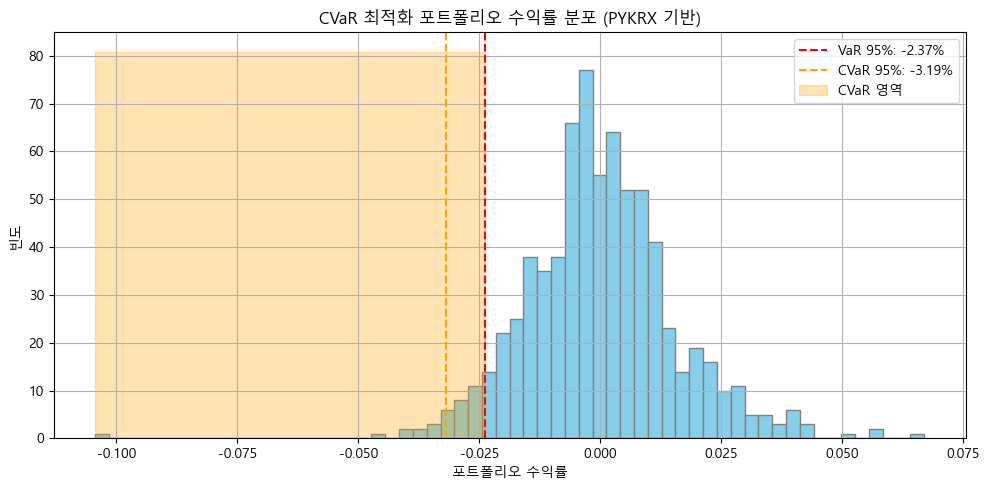

(       Ï¢ÖÎ™©      ÎπÑÏ§ë
 0    ÏÇºÏÑ±Ï†ÑÏûê  0.7153
 1  SKÌïòÏù¥ÎãâÏä§  0.0031
 2   NAVER  0.2816,
 -0.023736745142652314,
 -0.0319187707420461)

In [31]:
from pykrx import stock
from datetime import datetime, timedelta
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# ÏÑ§Ï†ï: 3Í∞ú Ï¢ÖÎ™© (ÏÇºÏÑ±Ï†ÑÏûê, SKÌïòÏù¥ÎãâÏä§, NAVER)
tickers = {
    "ÏÇºÏÑ±Ï†ÑÏûê": "005930",
    "SKÌïòÏù¥ÎãâÏä§": "000660",
    "NAVER": "035420"
}
end_date = datetime.today()
start_date = end_date - timedelta(days=365 * 3)

# 1. Í∞ÄÍ≤© Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
prices = pd.DataFrame()
for name, code in tickers.items():
    df = stock.get_market_ohlcv_by_date(start_date.strftime('%Y%m%d'),
                                        end_date.strftime('%Y%m%d'), code)
    prices[name] = df['Ï¢ÖÍ∞Ä']

# 2. ÏàòÏùµÎ•† Í≥ÑÏÇ∞
returns = np.log(prices / prices.shift(1)).dropna()
simulated_returns = returns.values
alpha = 0.95
n_assets = len(tickers)

# 3. Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ ÏàòÏùµÎ•† Î∞è CVaR Ìï®Ïàò
def portfolio_returns(weights, scenarios):
    return scenarios @ weights

def cvar_loss(weights):
    port_ret = portfolio_returns(weights, simulated_returns)
    var_threshold = np.percentile(port_ret, 100 * (1 - alpha))
    cvar = -port_ret[port_ret <= var_threshold].mean()
    return cvar

# 4. ÏµúÏ†ÅÌôî
init_guess = np.repeat(1/n_assets, n_assets)
bounds = [(0, 1)] * n_assets
constraints = [{'type': 'eq', 'fun': lambda x: np.sum(x) - 1}]
result = minimize(cvar_loss, init_guess, method='SLSQP', bounds=bounds, constraints=constraints)
opt_weights = result.x
opt_port_ret = portfolio_returns(opt_weights, simulated_returns)
VaR = np.percentile(opt_port_ret, 100 * (1 - alpha))
CVaR = opt_port_ret[opt_port_ret <= VaR].mean()

# 5. ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 5))
plt.hist(opt_port_ret, bins=60, color='skyblue', edgecolor='gray')
plt.axvline(VaR, color='red', linestyle='--', label=f'VaR 95%: {VaR:.2%}')
plt.axvline(CVaR, color='orange', linestyle='--', label=f'CVaR 95%: {CVaR:.2%}')
plt.fill_betweenx(y=[0, plt.gca().get_ylim()[1]], x1=min(opt_port_ret), x2=VaR, color='orange', alpha=0.3, label='CVaR ÏòÅÏó≠')
plt.title("CVaR ÏµúÏ†ÅÌôî Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ ÏàòÏùµÎ•† Î∂ÑÌè¨ (PYKRX Í∏∞Î∞ò)")
plt.xlabel("Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ ÏàòÏùµÎ•†")
plt.ylabel("ÎπàÎèÑ")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Í≤∞Í≥º ÏöîÏïΩ
weights_df = pd.DataFrame({
    'Ï¢ÖÎ™©': list(tickers.keys()),
    'ÎπÑÏ§ë': [round(w, 4) for w in opt_weights]
})
weights_df, VaR, CVaR


## 7. ÏãúÎÇòÎ¶¨Ïò§ Í∏∞Î∞ò Ïä§Ìä∏Î†àÏä§ ÌÖåÏä§ÌåÖ 

C:\Users\JYB\AppData\Local\Temp\ipykernel_21156\335041015.py:40: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  plt.tight_layout()
C:\Users\JYB\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


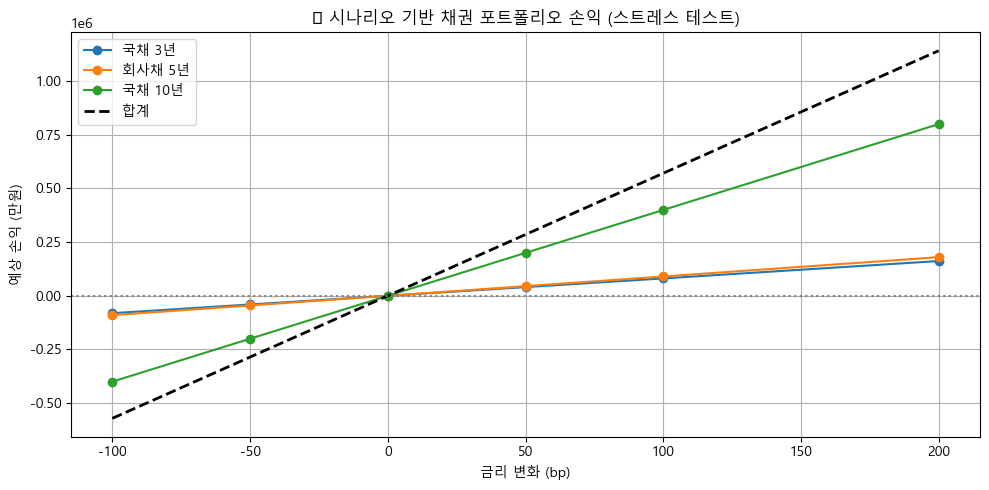

ModuleNotFoundError: No module named 'ace_tools'

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Í∞ÄÏ†ï: Ï±ÑÍ∂å Ìè¨Ìä∏Ìè¥Î¶¨Ïò§
bonds = pd.DataFrame({
    'Ï±ÑÍ∂åÎ™Ö': ['Íµ≠Ï±Ñ 3ÎÖÑ', 'ÌöåÏÇ¨Ï±Ñ 5ÎÖÑ', 'Íµ≠Ï±Ñ 10ÎÖÑ'],
    'ÏãúÏû•Í∞ÄÏπò(ÏñµÏõê)': [300, 200, 500],
    'ÏàòÏ†ïÎìÄÎ†àÏù¥ÏÖò': [2.7, 4.5, 8.0]
})

# 1bp Î≥ÄÌôî Ïãú ÏÜêÏã§Ïï° (DV01) Í≥ÑÏÇ∞
bonds['DV01(ÎßåÏõê)'] = bonds['ÏàòÏ†ïÎìÄÎ†àÏù¥ÏÖò'] * bonds['ÏãúÏû•Í∞ÄÏπò(ÏñµÏõê)'] * 10000 * 0.0001

# üìâ ÏãúÎÇòÎ¶¨Ïò§: Í∏àÎ¶¨ Ï∂©Í≤© (Îã®ÏúÑ: bp)
scenarios = [-100, -50, 0, 50, 100, 200]
results = {}

# Í∏àÎ¶¨ Î≥ÄÌôî Ïãú Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ Ï†ÑÏ≤¥ ÏÜêÏùµ Í≥ÑÏÇ∞
for bp in scenarios:
    delta = bonds['DV01(ÎßåÏõê)'] * bp
    results[f'{bp:+}bp'] = delta

# Í≤∞Í≥º Ï†ïÎ¶¨
df_result = pd.DataFrame(results)
df_result.index = bonds['Ï±ÑÍ∂åÎ™Ö']
df_result.loc['Ìï©Í≥Ñ'] = df_result.sum()

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 5))
for idx in df_result.index[:-1]:
    plt.plot(scenarios, df_result.loc[idx], label=idx, marker='o')
plt.plot(scenarios, df_result.loc['Ìï©Í≥Ñ'], label='Ìï©Í≥Ñ', color='black', linewidth=2, linestyle='--')
plt.axhline(0, color='gray', linestyle=':')
plt.title("üìâ ÏãúÎÇòÎ¶¨Ïò§ Í∏∞Î∞ò Ï±ÑÍ∂å Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ ÏÜêÏùµ (Ïä§Ìä∏Î†àÏä§ ÌÖåÏä§Ìä∏)")
plt.xlabel("Í∏àÎ¶¨ Î≥ÄÌôî (bp)")
plt.ylabel("ÏòàÏÉÅ ÏÜêÏùµ (ÎßåÏõê)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

import ace_tools as tools; tools.display_dataframe_to_user(name="Ïä§Ìä∏Î†àÏä§ ÌÖåÏä§Ìä∏ Í≤∞Í≥ºÌëú", dataframe=df_result)


In [34]:
# Ìëú Ï∂úÎ†• (Í∏∞Î≥∏ Î∞©Ïãù)
print(df_result)

# Î≥¥Í∏∞ Ï¢ãÍ≤å Ï∂úÎ†• (ÏÑ†ÌÉù ÏÇ¨Ìï≠)
import tabulate
print(tabulate.tabulate(df_result, headers='keys', tablefmt='pretty'))


          -100bp     -50bp  +0bp     +50bp    +100bp     +200bp
Ï±ÑÍ∂åÎ™Ö                                                            
Íµ≠Ï±Ñ 3ÎÖÑ   -81000.0  -40500.0   0.0   40500.0   81000.0   162000.0
ÌöåÏÇ¨Ï±Ñ 5ÎÖÑ  -90000.0  -45000.0   0.0   45000.0   90000.0   180000.0
Íµ≠Ï±Ñ 10ÎÖÑ -400000.0 -200000.0   0.0  200000.0  400000.0   800000.0
Ìï©Í≥Ñ     -571000.0 -285500.0   0.0  285500.0  571000.0  1142000.0
+------------+-----------+-----------+------+----------+----------+-----------+
|   Ï±ÑÍ∂åÎ™Ö   |  -100bp   |   -50bp   | +0bp |  +50bp   |  +100bp  |  +200bp   |
+------------+-----------+-----------+------+----------+----------+-----------+
|  Íµ≠Ï±Ñ 3ÎÖÑ  | -81000.0  | -40500.0  | 0.0  | 40500.0  | 81000.0  | 162000.0  |
| ÌöåÏÇ¨Ï±Ñ 5ÎÖÑ | -90000.0  | -45000.0  | 0.0  | 45000.0  | 90000.0  | 180000.0  |
| Íµ≠Ï±Ñ 10ÎÖÑ  | -400000.0 | -200000.0 | 0.0  | 200000.0 | 400000.0 | 800000.0  |
|    Ìï©Í≥Ñ    | -571000.0 | -285500.0 | 0.0  | 285500.0 | 571000.0 | 1142000.0 |
+----------